Here’s your text with *italics* used for the bullet point terms instead of **bold**, matching your preferred style:

---

# Model Evaluation

### Introduction

Evaluating a model goes beyond simply reporting accuracy scores; it helps us determine how robust our model is, whether it generalises well to unseen data, and highlights areas where improvements may be necessary.

We focus on key techniques for evaluating machine learning models, covering a range of measurements and methods to check how well a model performs. This helps us understand whether a model is reliable and accurate enough to be useful in practice. We will discuss the following key techniques:

### Classification metrics:

- *Accuracy*: Measures overall correctness, useful primarily when classes are balanced and all errors have equal importance.

- *Precision*: Focuses on the correctness of positive predictions, especially critical when false positives are costly (e.g., fraud detection, medical diagnostics).

- *Recall (Sensitivity)*: Captures the model’s ability to identify all true positives, essential when false negatives are highly consequential (e.g., cancer detection, security threats).

- *F1 Score*: Provides a balanced metric between precision and recall, ideal for evaluating models on imbalanced datasets, such as detecting rare diseases or fraudulent activities.

- *ROC* (Receiver Operating Characteristic): Visualises the trade-off between true positive rate and false positive rate at different threshold settings, useful for comparing multiple models and choosing appropriate classification thresholds.

- *AUC* (Area Under the ROC Curve): Provides a single numeric measure summarising the overall ability of the model to discriminate between classes; a higher AUC indicates better overall model performance.

- *Confusion Matrices*: Provide detailed visualisation of where a classification model makes correct or incorrect predictions, identifying true positives, false positives, true negatives, and false negatives clearly.

### Regression metrics:

- *Mean Absolute Error (MAE)*: Evaluates models by equally penalising all prediction errors, offering robustness against outliers and clear interpretation (useful in scenarios like house price prediction).

- *Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)*: Strongly penalise larger errors, valuable when significant prediction errors must be avoided (e.g., stock price forecasting, energy consumption).

- *R² Score*: Indicates how much variability in data is captured by the model, providing an intuitive understanding of model performance in predicting continuous outcomes, such as consumer spending or crop yields.

### Evaluation for Neural Networks:

- *Accuracy and Loss Curves*: Track training and validation performance over time, helping diagnose issues like overfitting or underfitting.

- *Cross-Entropy Loss*: Measures the performance of classification neural networks, effectively quantifying how well predicted probabilities match the true class labels.

## Evaluating machine learning classification models
### Spam, or Ham?

The *SpamBase dataset*, available from the UCI Machine Learning Repository, is commonly used in machine learning experiments focused on detecting spam emails. The goal of this dataset is to classify emails as either spam (unwanted commercial or malicious emails) or ham (legitimate, non-spam emails).

- There are 4601 emails.
- Features (attributes): 57 numeric attributes
- Features represent word frequency (e.g., "free", "credit", "money"), character frequencies (e.g., exclamation marks "!", dollar signs "$"), and other indicators often found in spam emails.
- Target Variable (Class Label):
- is_spam: Binary class label (1 indicates spam, 0 indicates legitimate).

Imagine we're testing a model designed to detect spam emails and it has been trained on some training data. Assume, we have a test dataset containing 200 emails in total.  Of these, 100 are actually *spam* and 100 are actually genuine (*not spam*). The machine learning model makes predictions about which emails are spam, and we record the predicted label.


### Install Python libraries

In [1]:
!pip install pandas nltk matplotlib seaborn scikit-learn tensorflow tensorflow-datasets

### Loading the dataset

In [2]:
import pandas as pd

# URL for the SpamBase dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

# Column names from the dataset documentation
# There are 57 feature columns and 1 label column (spam=1, not spam=0)
column_names= [
    # Word frequency features (percentage of words in the email that match)
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference',

    # Character frequency features (percentage of characters in the email)
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',

    # Capital run length features
    'capital_run_length_average',
    'capital_run_length_longest',
    'capital_run_length_total',

    # Target class (1 = spam, 0 = not spam)
    'class'
]

# Load dataset into Pandas DataFrame
spam_df = pd.read_csv(url, header=None, names=column_names)

# Show first 5 rows of the dataset
print(spam_df.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

### Prepare the train and test data (resampling)


In [3]:
from sklearn.model_selection import train_test_split

# Split dataset into features (X) and target labels (y)
X = spam_df.drop(columns=['class'])
Y = spam_df['class']

seed = 7

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

We now scale the data as a preprocessing step as many of the models we will demonstrate will benefit from it. We also set up all our models in one go and store them in a dictionary:

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Standardise the features (important for models like SVM and KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models for evaluation in a dictionary for handling multiple models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine (SVM)": SVC(kernel="linear"),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


## Evaluating machine classification learning models
Now we have a dictionary storing our models, we can iterate through each one and train it on the training data:

In [5]:
# Train each model 
for name, model in models.items():
    print(f"Training  Model: {name}")

    # Train the specific model
    model.fit(X_train, y_train)

Training  Model: Logistic Regression
Training  Model: Random Forest
Training  Model: Support Vector Machine (SVM)
Training  Model: K-Nearest Neighbors
Training  Model: Decision Tree


### Accuracy
Accuracy is a fundamental metric used to evaluate classification models, measuring the proportion of correctly predicted instances out of the total number of predictions. It is calculated as the ratio of correct predictions to the total dataset size, providing a straightforward way to assess overall model performance. For example, if a model correctly classifies 90 out of 100 test samples, its accuracy is 90%. This metric is particularly useful when dealing with balanced datasets, where all classes have roughly equal representation.

However, accuracy can be misleading when applied to imbalanced datasets. In cases where one class significantly outnumbers another, a model could achieve high accuracy by simply predicting the majority class while failing to correctly classify the minority class. 

For example, in a fraud detection scenario where 98% of transactions are legitimate, a model that predicts "not fraud" for every instance would still achieve 98% accuracy, despite failing to detect any fraudulent transactions. Additionally, accuracy does not distinguish between types of errors—false positives and false negatives are weighted equally, which may not be suitable for applications where certain types of errors carry greater consequences, such as medical diagnoses or security systems. For such cases, precision, recall, and the F1-score provide a more meaningful assessment of model performance.

In [6]:
from sklearn.metrics import accuracy_score

for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"accuracy: {accuracy:.4f} - {name}")

accuracy: 0.9121 - Logistic Regression
accuracy: 0.9533 - Random Forest
accuracy: 0.9153 - Support Vector Machine (SVM)
accuracy: 0.8882 - K-Nearest Neighbors
accuracy: 0.9186 - Decision Tree


### Precision, Recall, and F1-score
These metrics are especially useful for datasets where certain outcomes are rare or imbalanced:

- Precision means: "Of all predictions marked positive, how many are truly positive?" It's critical when false positives have a high cost (e.g., legitimate emails marked as spam).

- Recall (Sensitivity) answers: "Of all actual positives, how many did we correctly predict?" It's essential when false negatives carry significant risks (e.g., detecting diseases).

Then we have the F1-Score, which provides a balance, offering a single metric that incorporates both precision and recall, especially useful for imbalanced datasets as we said before.

In [7]:
from sklearn.metrics import classification_report

for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Display classification report
    print(f"classification report - {name}:")
    
    print(classification_report(y_test, y_pred))


classification report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       549
           1       0.92      0.86      0.89       372

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.91       921
weighted avg       0.91      0.91      0.91       921

classification report - Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       549
           1       0.96      0.92      0.94       372

    accuracy                           0.95       921
   macro avg       0.95      0.95      0.95       921
weighted avg       0.95      0.95      0.95       921

classification report - Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       549
           1       0.91      0.88      0.89       372

    accuracy                           0.92 

### ROC Curve and AUC
The *ROC* (*Receiver Operating Characteristic*) curve shows how well the model balances sensitivity (how well it catches the correct positive cases) and specificity (how well it avoids false alarms). It does this by plotting the true positive rate against the false positive rate at different thresholds.

The *AUC* (*Area Under the Curve*) gives a single number that summarises how well the model can tell the difference between classes. A higher AUC means better performance:

- 1.0 = perfect separation between classes

- 0.5 = no better than random guessing

ROC curves are especially useful when you want to see which classes your model finds harder to predict. This is important in imbalanced datasets (where some classes have many more examples than others), where accuracy can be misleading.

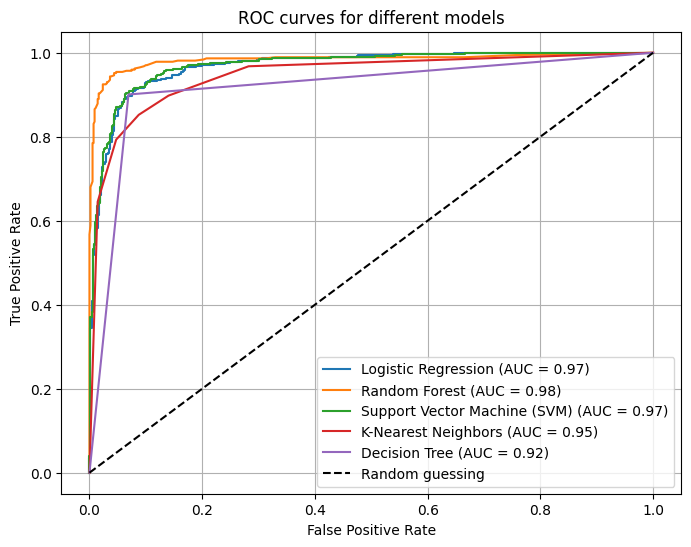

In [8]:
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set figure size for ROC plot

# Loop through each model in the dictionary
for name, model in models.items():
    # Get predicted probabilities or decision scores for the positive class
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]  # Use probability for class 1 (e.g. spam)
    else:
        y_probs = model.decision_function(X_test)  # Use decision scores (e.g. for SVM)

    # Calculate false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)  # Area Under the Curve (AUC)

    # Plot ROC curve for the current model
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Add diagonal line representing random guessing
plt.plot([0, 1], [0, 1], "k--", label="Random guessing")

# Add axis labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves for different models")

# Show legend and grid
plt.legend()
plt.grid(True)

### Confusion Matrices

A *confusion matrix* is a straightforward table used to measure how well a classification model is doing. It clearly shows the number of times the model makes correct and incorrect predictions, helping us quickly understand its performance. There are several key values in a confusion matrix:

### True Positives (TP):
This is the count of Emails the model correctly identified as spam. So you would count every email that the model predicted *as spam* and is *actually spam*. In our example, the model correctly labelled 80 out of 100 actual spam emails, which we define as *TP = 80*.

### False Negatives (FN):
Emails the model missed (predicted incorrectly as genuine emails, even though they were spam). Count every email the model labelled as *not spam* but was *actually spam*. For illustration, assume that out of the 100 spam emails, the model missed *20 emails* to give *FN = 20*.  
*Note*: TP + FN = total actual spam emails, 80 + 20 = 100.

### False Positives (FP):
Emails incorrectly marked as spam when they were actually genuine. Here, we count emails that the model labelled *as spam* but were *actually not spam*. In our model, the model incorrectly flagged *10 genuine emails* as spam giving *FP = 10*.

### True Negatives (TN):
Emails correctly recognised as genuine (non-spam). We count emails that the model labelled as not spam and were indeed actually not spam. If we have 100 genuine emails in out data, and the model correctly identified *90* as genuine, we have *TN = 90*.  
*Note*: FP + TN = total actual genuine emails, 10 + 90 = 100.

The confusion matrix breaks down predictions into these four categories, arranged into a table:

|                   | **Predicted: Positive** | **Predicted: Negative** |
|-------------------|-------------------------|-------------------------|
| **Actual: Positive** | TP = 80                | FN = 20               |
| **Actual: Negative** | FP = 10                | TN = 90               |

We have included TP, FP, FN, and TN for reference. In a true confusion matrix we would just observe the numeric values. From this confusion matrix, we can quickly assess how well the model performs:

- Overall, the model made 170 correct predictions out of 200 (85% accuracy).
- Of all emails marked spam (90), 80 actually were spam, meaning precision = 80/90 ≈ 89%. This measures reliability.
- Of all actual spam emails (100), the model correctly identified 80, meaning recall = 80%. This measures how effectively the model catches real spam.

This breakdown helps us easily spot exactly where the model is getting things right or wrong, and guides us in improving its predictions — whether it's reducing false alerts (false positives) or catching more missed cases (false negatives).

In practical terms, confusion matrices help spot if your spam detection model is missing too many real spam emails (false negatives), or incorrectly marking legitimate emails as spam (false positives):

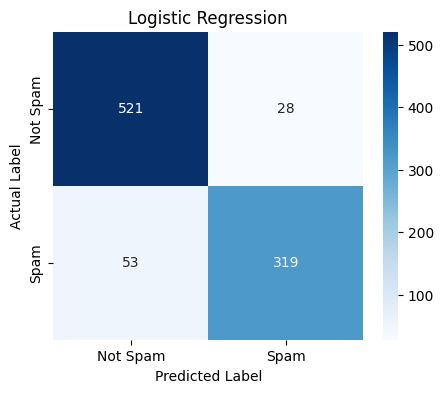

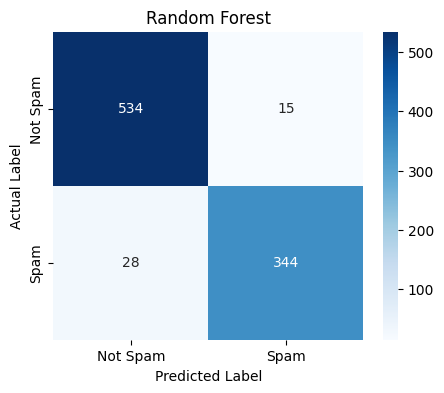

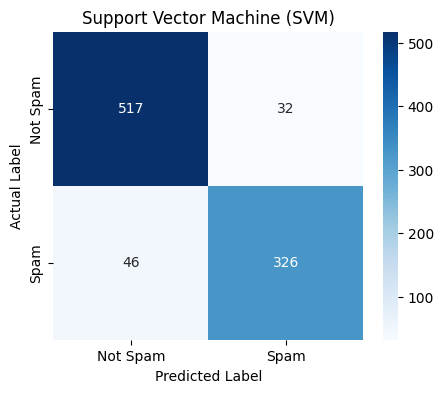

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Compute and display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 4))
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
    
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    
    plt.title(f"{name}")

### Evaluating Neural Network classification models
Neural networks often require specialised evaluation methods. We commonly look at accuracy, loss curves, and cross-entropy loss:

- *Accuracy* can be used as before to indicate overall prediction correctness, but can be misleading if classes are imbalanced. 

- *Loss Curves* track model improvement over training epochs. When we plot these curves, we should ideally, we should see training and validation losses consistently decrease and eventually stabilise.

- *Cross-Entropy Loss* specifically measures the divergence between predicted probabilities and actual values, commonly used for classification problems.

In the next part, we will explore these methods and their use for evaluating neural network models. So far, we have looked at binary classification (Spam vs Ham), so let's now consider a multi-class classification problem at the same time.

## EuroSAT - multi-class problem
EuroSAT is a dataset of satellite images that helps researchers and engineers train artificial intelligence (AI) models to analyse land use and environmental changes from space. It consists of thousands of high-resolution images captured by the European Space Agency’s Sentinel-2 satellite, covering ten different land types such as forests, farmland, motorways, rivers, and urban areas.

This dataset is particularly useful for *remote sensing*, where AI can monitor deforestation, water bodies, and urban expansion over time. In *agriculture*, it helps farmers and policymakers track crop health, detect drought-affected regions, and optimise land use for better food production. In *urban planning*, EuroSAT assists governments in mapping city growth, identifying infrastructure needs, and managing natural resources more efficiently.

Models trained on EuroSAT, can help scientists develop automated systems to monitor environmental changes, improve disaster response, and make smarter decisions for sustainable development.

### Loading the data

First, we'll load the dataset, which is packaged with the tensorflow library. We will preprocess the images by resizing and normalising before training:

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the EuroSAT dataset (RGB version) with labels and metadata
dataset, info = tfds.load(
    "eurosat/rgb",             # Dataset name
    as_supervised=True,        # Return (image, label) pairs
    with_info=True,            # Include metadata (e.g. class names)
    split='train'              # Load the training split (all images are in this split)
)

# Define a preprocessing function to prepare the images
def preprocess(image, label):
    image = tf.image.resize(image, (64, 64))  # Resize all images to 64x64
    image = image / 255.0                     # Normalise pixel values to range [0, 1]
    return image, label

# Apply the preprocessing to the entire dataset
dataset = dataset.map(preprocess)

# Extract class names and number of classes from the dataset metadata
class_names = info.features["label"].names
num_classes = len(class_names)

# Print summary information
print(f"Dataset loaded with {num_classes} classes: {class_names}")


We visualise a sample of the dataset by first shuffling the images, and then performing random sampling. Next, we batch images to easily fetch multiple images at once, and convert the labels to readable class names for clearer visualisation, before plotting the samples:

In [ ]:
import matplotlib.pyplot as plt

# Plot 12 random images from the dataset
plt.figure(figsize=(12, 10))  # Set up a large figure for 12 images

# Shuffle the dataset, take a batch of 12 images, and plot them
for images, labels in dataset.shuffle(1000).batch(12).take(1):
    for i in range(12):
        plt.subplot(3, 4, i + 1)  # Arrange images in a 3x4 grid
        plt.imshow(images[i].numpy())  # Convert tensor to NumPy array and display image
        plt.title(class_names[labels[i]])  # Display the class name as the title
        plt.axis('off')  # Hide axis ticks for cleaner layout

# Add a main title and adjust spacing
plt.suptitle('Sample images from EuroSAT dataset', fontsize=16)
plt.tight_layout()


We will define and train a neural network for classifcation of images based on multiple classes by way of a more advanced example.

We'll use a *Convolutional Neural Network* (CNN), to demonstrate, which is a common choice for image classification. We will explore these models in more depth when we look at deep learning, but for now, the process is the same as we have seen before using classical machine learning models. We extract train and test sets with 80% of the data used for training and 20% for testing:

In [ ]:
# Shuffle and split dataset
train_size = 0.8  # Proportion of data to use for training
total_size = len(list(dataset))  # Get total number of samples in the dataset

train_count = int(total_size * train_size)  # Calculate number of training samples

# Shuffle dataset with a buffer size of 1000 (for randomness)
dataset = dataset.shuffle(1000)

# Split into training and test sets, then batch both
train_dataset = dataset.take(train_count).batch(32)  # Take first N samples for training
test_dataset = dataset.skip(train_count).batch(32)   # Skip N samples for testing

# Display how many samples are in each split
print(f"Train samples: {train_count}, Test samples: {total_size - train_count}")


The next part of our code builds and trains an image classification model using the CNN model.

The CNN consists of three *convolutional layers*, these are special layers that act like filters scanning over the image to detect patterns such as edges, shapes, or textures—much like how our eyes might notice outlines or corners that detect patterns in the images.  The model processes our images (64×64 pixels, with 3 color channels) and learns patterns through these layers by way of feature extraction.

This is followed by *max-pooling layers*, which shrink the image by taking only the most important information from small sections—imagine looking at a group of pixels and keeping only the brightest one to simplify the picture without losing key details. In short, this step reduces the image size while keeping important features.

The extracted information is then flattened to convert it from a 2D or 3D structure into a single long line of numbers, so it can be used by regular layers of a neural network. These are passed through *dense layers*, which are fully connected layers where every number influences the output, helping the network learn complex combinations and patterns. This includes a *dropout layer* -- a safety mechanism that randomly turns off some connections during training to prevent the model from relying too heavily on any one pattern. This helps avoid overfitting, so that the network does not simply memorise the training data, but instead can generalise to new inputs). 

Finally, the *softmax output layer* turns the model’s raw scores into probabilities, so it can assign probabilities to different classes of image in terms of whether an image is more likely representative of farm land, urban, or residential areas.

The model is compiled using the *Adam optimiser* -- a smart method that adjusts how much the model changes during learning, which helps the model learn faster and more efficiently by balancing how quickly or slowly it updates its guesses. 

We also use *sparse categorical cross-entropy loss* as a way to measure how far off the model’s predictions are from the correct answers when dealing with multiple categories; it works especially well when the correct answers are given as simple numbers, like 0, 1, 2, etc. 

Training happens over 10 epochs, using a training dataset and validating against a test dataset. After training, the model is saved for future use:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

epochs_n = 5  # Number of training epochs

# Define a Convolutional Neural Network (CNN) model
model = keras.Sequential([
    keras.Input(shape=(64, 64, 3)),  # Input layer for 64x64 RGB images
    layers.Conv2D(32, (3, 3), activation="relu"),  # First convolutional layer
    layers.MaxPooling2D(2, 2),                     # First max-pooling layer
    layers.Conv2D(64, (3, 3), activation="relu"),  # Second convolutional layer
    layers.MaxPooling2D(2, 2),                     # Second max-pooling layer
    layers.Conv2D(128, (3, 3), activation="relu"), # Third convolutional layer
    layers.MaxPooling2D(2, 2),                     # Third max-pooling layer
    layers.Flatten(),                              # Flatten the feature maps into a vector
    layers.Dense(128, activation="relu"),          # Fully connected dense layer
    layers.Dropout(0.5),                           # Dropout for regularisation (prevent overfitting)
    layers.Dense(num_classes, activation="softmax")  # Output layer for multi-class classification
])

# Compile the model with optimiser, loss function, and evaluation metric
model.compile(
    optimizer="adam", 
    loss="sparse_categorical_crossentropy",  # Use sparse labels (integers) for classification
    metrics=["accuracy"]
)

# Train the model using the training dataset and validate on the test dataset
history = model.fit(train_dataset, validation_data=test_dataset, epochs=epochs_n)

# Save the trained model to a file
model.save('model.keras')

Now the model has been trained, we can make predictions using our test image set. Let's plot a sample of test images with true and predicted labels to get a visual summary of how well the model is doing and what classes it might be struggling with:

In [ ]:
import numpy as np

# Create a large figure for displaying multiple images in a grid
plt.figure(figsize=(15, 12))  

# Get one batch of images and labels from the test dataset
for images, labels in test_dataset.take(1):
    # Predict class probabilities for each image in the batch
    preds = model.predict(images)

    # For each prediction, take the index of the highest probability as the predicted class
    pred_labels = np.argmax(preds, axis=1)

    # Loop through the first 12 images in the batch
    for i in range(12):
        # Set up a subplot: 3 rows × 4 columns
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy())  # Convert tensor to array and display the image

        # Get the true and predicted class names
        true_label = class_names[labels.numpy()[i]]
        predicted_label = class_names[pred_labels[i]]

        # Choose colour: green if prediction is correct, red otherwise
        colour = "green" if true_label == predicted_label else "red"

        # Display labels as title above the image
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=colour)
        plt.axis('off')  # Hide axes to keep the layout clean

# Add a main title for the full set of subplots
plt.suptitle('Sample predictions from EuroSAT Dataset', fontsize=16)


We will now evaluate the model on the whole test dataset and collect predictions for further analysis. We start by using `model.evaluate(test_dataset)`, which calculates the test *loss* and *accuracy*, providing an initial measure of performance. The test accuracy is then printed to give an immediate indication of how well the model generalises to unseen data.

In [ ]:
import numpy as np                              # For array operations
from sklearn.metrics import classification_report, confusion_matrix  # For evaluation metrics
import matplotlib.pyplot as plt                 # For plotting
import seaborn as sns                           # For heatmaps and advanced visuals

# Evaluate the trained model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")  # Display test accuracy (formatted to 4 decimal places)


Next, we iterate through the test dataset to extract actual labels (`y_true`) and predicted labels (`y_pred`). The model generates predictions in the form of class probability distributions, and `np.argmax(preds, axis=1)` selects the most probable class for each instance. 

The actual labels, initially stored as tensors, are converted to NumPy arrays using `labels.numpy()`. These predictions and true labels can later be used to compute additional evaluation metrics such as *precision*, *recall*, and *confusion matrices* to gain deeper insights into the model's strengths and weaknesses.

In [ ]:
# Prepare lists for true and predicted labels
y_true = []
y_pred = []

# Loop through test dataset and collect predictions
for images, labels in test_dataset:
    preds = model.predict(images)  # Predict class probabilities
    y_pred.extend(np.argmax(preds, axis=1))  # Get predicted class index
    y_true.extend(labels.numpy())            # Get true labels from tensor


### Accuracy
We first inspect the accuracy of our neural network model:

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)

print(f"Test Accuracy: {test_acc:.4f}")

### Precision, Recall, and F1-Score
Next, we breakdown the models performance for all the classes. As we said, this measure is crucial in situations with imbalanced datasets, as accuracy alone might be misleading:

In [ ]:
# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

### ROC Curve and AUC
The ROC curve measures the trade-off between sensitivity (true positive rate) and specificity (1 - false positive rate). AUC indicates overall class separability (higher values = better model, 1 is perfect, 0.5 is random guessing). For imbalanced datasets, AUC gives more insight compared to accuracy alone.

ROC and AUC are commonly used for binary classification (deciding between two classes), they also work in multi-class settings by evaluating each class separately. In our case, since we have multiple classes, we calculate a separate ROC curve and AUC score for each one. This helps us pinpoint which specific classes the model is struggling with:

In [ ]:
import numpy as np                      # For working with arrays
import matplotlib.pyplot as plt         # For plotting graphs
from sklearn.metrics import roc_curve, auc            # ROC curve and AUC calculation
from sklearn.preprocessing import label_binarize      # Convert labels to one-hot encoded format
from itertools import cycle             # For cycling through colours in plots

# Prepare empty lists for true labels and predicted probabilities
y_true = []
y_pred_probs = []

# Loop through the test dataset to collect model predictions and actual labels
for images, labels in test_dataset:
    preds = model.predict(images)          # Get predicted probabilities for each class
    y_pred_probs.extend(preds)             # Add predicted probabilities to list
    y_true.extend(labels.numpy())          # Convert labels to NumPy arrays and add to list

# Convert collected data to NumPy arrays
y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs)

# Convert true labels to one-hot encoding (required for ROC computation in multi-class)
num_classes = 10
y_true_bin = label_binarize(y_true, classes=range(num_classes))

# Initialise dictionaries to hold false positive rates, true positive rates, and AUCs
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and AUC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])  # ROC points
    roc_auc[i] = auc(fpr[i], tpr[i])  # Area Under Curve for each class

# Set up the plot
plt.figure(figsize=(10, 8))

# Cycle through a list of colours for each curve
colours = cycle(['blue', 'red', 'green', 'purple', 'orange', 
                 'cyan', 'magenta', 'brown', 'olive', 'gray'])

# List of class names corresponding to each class index
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway',
               'Industrial', 'Pasture', 'PermanentCrop', 'Residential',
               'River', 'SeaLake']

# Plot each class’s ROC curve with its AUC value
for i, colour in zip(range(num_classes), colours):
    plt.plot(fpr[i], tpr[i], color=colour, 
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot a dashed diagonal line to represent random chance (baseline)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

# Add axis labels and title
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Multi-class ROC curve for EuroSAT dataset')

# Show legend and grid
plt.legend(loc='lower right')
plt.grid(True)


### Confusion Matrix
We can generate a confusion matrix to compare the performance for each class. This provides insight into specific areas where the neural network might struggle, by inspecting the particular classes:

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

### Loss Function
After training the model, we can look at the following data to see how well the learning process went:

- `history.history['loss']`: This shows how much error the model made on the *training set* (the data it learnt from) after each round of learning, called an *epoch*.  
- `history.history['val_loss']`: This shows the error on the *validation set* based on separate data the model hasn't seen before, used to test how well it's generalising during training.

Ideally, both the training and validation losses should go down over time indicating that the model is improving and learning useful patterns.

However, if the *validation loss* starts to go up while the *training loss* keeps going down, it might mean the model is *overfitting*. In other words, the model is memorising the training data too well and struggling to perform well on new, unseen data:

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 4))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()

plt.grid(True)


## Evaluating machine learning regression models
Regression models are machine learning or statistical models used to predict numeric or continuous outcomes, such as house prices, temperatures, or sales figures, based on input data. They identify patterns and relationships between independent variables (inputs) and a dependent variable (output).

Evaluating regression models, involves different metrics compared to classification tasks because we're predicting numeric values rather than discrete classes.

Common evaluation metrics for continuous models include:

- *Mean Absolute Error (MAE)*:  
  Measures the average absolute difference between predicted values and true values. It's intuitive and easy to interpret, indicating how far predictions typically deviate from actual observations.

- *Mean Squared Error (MSE)*:  
  Calculates the average of squared differences between predicted and actual values. Squaring errors gives more weight to larger errors, making it sensitive to significant deviations.

- *Root Mean Squared Error (RMSE)*:  
  The square root of MSE, bringing the metric back to the original units of measurement. It's widely used due to interpretability in the same units as the target variable.

- *R-squared (Coefficient of Determination)*:  
  Indicates how well the model explains the variability of the data. An R-squared closer to 1 means the model fits the data well; closer to 0 suggests the model doesn't explain the variability effectively.

When evaluating regression models, it's often beneficial to use multiple metrics simultaneously, as each metric provides a different insight into model performance. For example, RMSE and R-squared are commonly used together: RMSE gives an intuitive understanding of error magnitude, while R-squared provides insight into the explanatory power of the model.

We will cover each one in more detail below.

### Loading the data

The *Diabetes* dataset is a classic medical dataset provided by the `scikit-learn` library. It consists of real-world clinical data collected from diabetes patients, and is primarily used to *predict disease progression over time* based on a variety of physiological and health-related factors.

Each entry in the dataset corresponds to a single patient and includes *10 numerical features* such as age, sex, body mass index (BMI), average blood pressure, and various blood serum measurements. These features are continuous and have been *standardised* (mean zero, unit variance), which makes the dataset ready for many regression algorithms without additional preprocessing.

The *target variable* is a quantitative measure of diabetes disease progression one year after baseline. It is a *continuous numeric value*, making this dataset well-suited for *regression tasks* rather than classification.

The dataset includes *442 instances* and has *no missing values*, which makes it ideal for demonstrating regression models.

Because of its manageable size and medical context, the Diabetes dataset is frequently used to illustrate core concepts in *regression*, and *model evaluation* (e.g. RMSE, MAE, R²):

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load and convert to DataFrame
diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

df['target'] = diabetes.target

# Display first few rows
df.head()


## Train and test sets
We now organise our data into train and test sets as usual, then discuss the measures we will implement:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop(columns=["target"])  # Feature variables
Y = df["target"]  # Target variable

seed = 7

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

# Standardise the feature values (important for models like SVM & KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

### MAE
Mean Absolute Error (MAE) offers a straightforward average of errors without exaggerating outliers. MAE is a simple but powerful way to measure how accurate predictions from a model or forecast are compared to actual observed values. Imagine you're trying to guess how many candies are in several jars, and each guess might be a bit off. MAE is the average of how far off all your guesses were, regardless of whether you guessed too high or too low.

Specifically, MAE takes the absolute difference between predicted values and the actual values—this means it doesn't matter whether your predictions were higher or lower; only the size of the errors matters. It then averages these differences to provide a single number that clearly represents the typical prediction error you can expect from your model.

People often use MAE because it’s straightforward and intuitive—easy to understand even without a technical background. For example, if you're predicting house prices, an MAE of 10,000 would mean your predictions are typically off by about \$10,000, giving you a clear, practical sense of the accuracy and reliability of your predictions.

### MSE

Mean Squared Error (MSE) highlights significant prediction errors, penalising large deviations heavily. MSE is a common way of measuring how accurate predictions are, especially in scenarios where larger mistakes are particularly important. Imagine you're throwing darts at a dartboard, and each dart represents your prediction. MSE doesn't just measure how far off each dart is from the bullseye—it actually squares that distance. This means that predictions which miss by a lot are heavily penalized compared to smaller errors.

To calculate MSE, you take each prediction error (the difference between your prediction and the real value), square it (which makes every error positive and exaggerates big mistakes), and then average all those squared errors. Squaring the errors helps highlight predictions that are significantly wrong, ensuring models that make big mistakes appear clearly worse.

Because of this approach, MSE is especially useful in situations where large errors can have big consequences. For example, in predicting house prices, a prediction that's off by $100,000 would have an enormous impact compared to predictions off by just a few thousand dollars. When using MSE, you ensure that the final measure emphasises and discourages these large mistakes, helping you build a more reliable and accurate predictive model.

### Root Mean Squared Error (RMSE)
Root Mean Squared Error (RMSE) is a popular way to measure how accurate predictions are—think of it as a "typical size" of the prediction mistakes a model makes. To understand RMSE, imagine you're predicting how long it takes to drive home from work. Sometimes you underestimate by a few minutes; other times, traffic makes you underestimate by a lot more. RMSE helps summarize these errors into one clear number.

RMSE is the square root of MSE, easier to interpret in terms of original units of measurement. To calculate RMSE, first, you find the difference between each prediction and the real observed value, and then square each of those differences. Next, you take the average (mean) of all these squared errors. Finally—and importantly—you take the square root of that average. The result gives you an error measure that's on the same scale as your original data, making it intuitive and easy to understand.

RMSE is valuable because it highlights larger errors (due to squaring earlier in the calculation) but returns to the original units (like minutes, dollars, or miles) thanks to taking the square root at the end. For example, an RMSE of 5 minutes in your commuting prediction model tells you that typically, your predictions are off by around 5 minutes, providing a simple way to judge the accuracy of your predictions at a glance.

### R² Score
The *R² Score*, also known as the *coefficient of determination*, is a popular measure used to indicate how well predictions made by a statistical model match the actual observed data. Think of it as a percentage score, telling you how much of the variability in the data your model successfully explains.

Specifically, an R² value ranges from 0 to 1. A score of 1 means your model perfectly predicts every single observation—it's as if you had accurately guessed the exact height of everyone in a room. A score of 0, however, indicates your model performs no better than simply using the average of the data as your prediction, similar to guessing everyone’s height is the same, average height. It’s also possible to have negative R² values, meaning your model is actually doing worse than just guessing the average.

Because it's expressed as a percentage-like measure, R² is very intuitive. For example, if a house-price prediction model has an R² score of 0.8, this means that 80% of the variability in house prices can be explained by the model, while the remaining 20% is due to factors the model doesn't account for. This makes R² a useful and easily understandable way to judge the effectiveness of predictive models.

The code below, builds, trains, and evaluates the model. We start by defining a function `build_nn()` that constructs a simple feedforward neural network with three hidden layers containing 64, 32, and 16 neurons respectively, all using the ReLU activation function.

The output layer has a single neuron, as the task is to predict a continuous numerical value (regression). The model is compiled using the Adam optimiser and with the mean squared error (MSE) as the loss function, with mean absolute error (MAE) included as an additional performance metric for us to inspect later.

The model is trained on the training data for 50 epochs using a batch size of 16. We reserve 20% of the training data for validation during training. After training is complete, we predict outcomes on the test set, and the predictions are flattened into a one-dimensional array.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define Neural Network model
def build_nn():
    model = keras.Sequential([
        layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)  # Single output neuron for regression
    ])

    # Compile the model
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

# Build the model
nn_model = build_nn()

# Train the model and store training history
history = nn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

The model’s performance is evaluated using the metrics we have discussed, including MAE, MSE, Root Mean Squared Error (RMSE), and the R² Score. We print these results to the console to see how accurately the neural network is making predictions compared to the actual test data:

In [ ]:
# Make predictions
y_pred = nn_model.predict(X_test).flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"\nNeural Network Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Let's plot the training and validation loss over the epochs. If our model is healthy model we will see both training and validation loss go down together and stay low, which means the model is learning useful patterns and generalising well.

We can also spot any overfitting. If the training loss goes down and stays low, and validation loss starts to go up after some point it means the model is memorising the training data and struggling to generalise to new data.

If both training and validation loss stay high, then we have the reverse problem of underfitting. Here the model is too simple or hasn't trained long enough to capture patterns in the data.

Looking at the plot will enable us to decide whether or not it would be appropriate to stop training at a given epoch (e.g. early stopping when validation loss starts to rise).

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss per Epoch')

plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')

plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')

plt.title('MAE per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')

plt.legend()
plt.grid(True)

plt.tight_layout()

### What have we learnt?

For classification tasks, accuracy works best when your classes are balanced and errors carry equal importance. However, in scenarios where classes are imbalanced or the cost of mistakes differs significantly—such as detecting fraud or diagnosing diseases—it’s preferable to rely on precision, recall, or the F1 score to evaluate your model. Always examine the confusion matrix as well, since it provides clear insight into exactly how your model is making correct and incorrect predictions.

For regression tasks, the R² score helps you understand how much of the variability in your data is explained by your model. Mean Absolute Error (MAE) is a robust measure that's less sensitive to outliers, making it suitable for general predictions like house prices or temperature forecasts. Conversely, Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) heavily penalise larger mistakes, making them ideal choices when significant errors have substantial consequences, such as forecasting electricity demand or stock prices.

To help you, here is a table summarising these metrics that you can refer to when considering which methods to apply to your projects:

| Metric           | Type           | Emphasis                        | Outliers/Imbalance? | Example Models                          | Data & Examples                         |
|------------------|----------------|---------------------------------|---------------------|-----------------------------------------|-----------------------------------------|
| Accuracy         | Classification | Overall correctness             | Yes                 | LogReg, Dec. Trees, RF, SVM, NN         | Spam, disease detection                 |
| Precision        | Classification | Correct positive predictions    | Yes                 | LogReg, Dec. Trees, RF, SVM, NN         | Fraud detection, diagnosis              |
| Recall           | Classification | Capturing all positives         | Yes                 | LogReg, Dec. Trees, RF, NN              | Cancer, anomaly detection               |
| F1 Score         | Classification | Balance Precision/Recall        | Yes                 | LogReg, Dec. Trees, RF, SVM, NN         | Rare diseases, fraud                    |
| Confusion Matrix | Classification | Breakdown of results            | Clearly shows errors| All classifiers                         | Medical tests, face recognition         |
| MAE              | Regression     | Equal penalty for errors        | No                  | Linear Reg, RF, Dec. Trees, NN          | House prices, temp. forecasts           |
| MSE/RMSE         | Regression     | Penalises large errors          | Yes                 | Linear Reg, Gradient Boost, RF, NN      | Stock prices, electricity demand        |
| R² Score         | Regression     | Variability explained by model  | Moderate            | Linear/Poly Reg, RF, NN                 | Crop yields, consumer spending          |


Finally, carefully interpret your metrics within the context of your application—no single metric tells the entire story.